# Teoría Naive Bayes

El algoritmo de Naive Bayes es un algoritmo de clasificación en aprendizaje automático que se basa en el Teorema de Bayes. Es particularmente útil para problemas de clasificación de texto, como la clasificación de correos electrónicos como spam o no spam. El enfoque "ingenuo" del algoritmo se debe a la suposición de independencia condicional entre las características. 

**Explicación del Algoritmo de Naive Bayes:**

1. **Teorema de Bayes:** El algoritmo de Naive Bayes se basa en el Teorema de Bayes, que es una fórmula que describe cómo se actualiza la probabilidad de un evento dado un nuevo conocimiento. La fórmula del Teorema de Bayes es:

   ```
   P(A|B) = P(B|A) * P(A) / P(B)
   ```

   - `P(A|B)`: Probabilidad de que ocurra el evento A dado el evento B.
   - `P(B|A)`: Probabilidad de que ocurra el evento B dado el evento A.
   - `P(A)`: Probabilidad previa del evento A.
   - `P(B)`: Probabilidad previa del evento B.

2. **Suposición de Independencia:** En el algoritmo de Naive Bayes, se realiza una suposición "ingenua" de que las características son independientes entre sí, lo que significa que la presencia o ausencia de una característica no está relacionada con la presencia o ausencia de otras características. Esta suposición simplifica el cálculo de las probabilidades.

3. **Clasificación de Texto:** El algoritmo de Naive Bayes es comúnmente utilizado en la clasificación de texto. Por ejemplo, para la clasificación de correos electrónicos como spam o no spam. Las características son las palabras o términos en el texto, y el objetivo es determinar la probabilidad de que un correo electrónico dado sea spam o no spam.

4. **Cálculo de Probabilidades:** El algoritmo calcula la probabilidad de que un documento dado pertenezca a cada clase (por ejemplo, spam o no spam). Utiliza el Teorema de Bayes para actualizar las probabilidades utilizando las probabilidades previas y la suposición de independencia.

5. **Clasificación:** Una vez que se calculan las probabilidades para cada clase, se clasifica el documento como la clase con la probabilidad más alta.

**Imágenes Ilustrativas:**

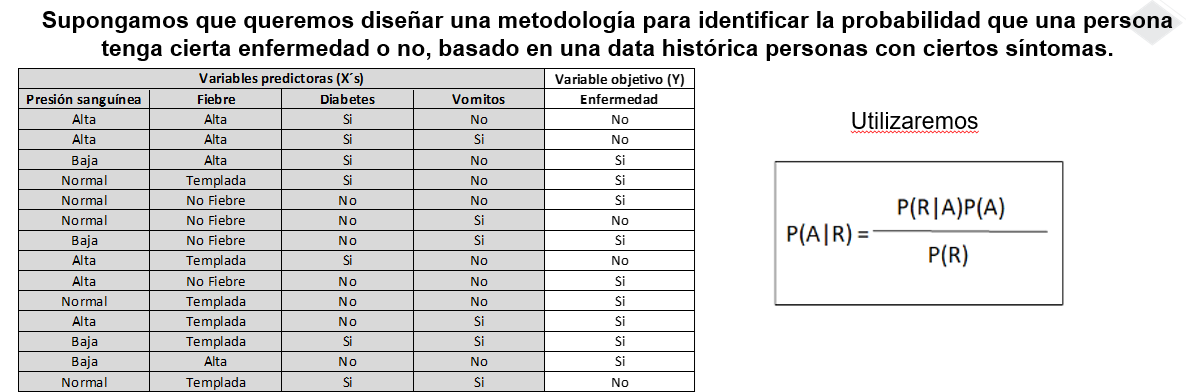

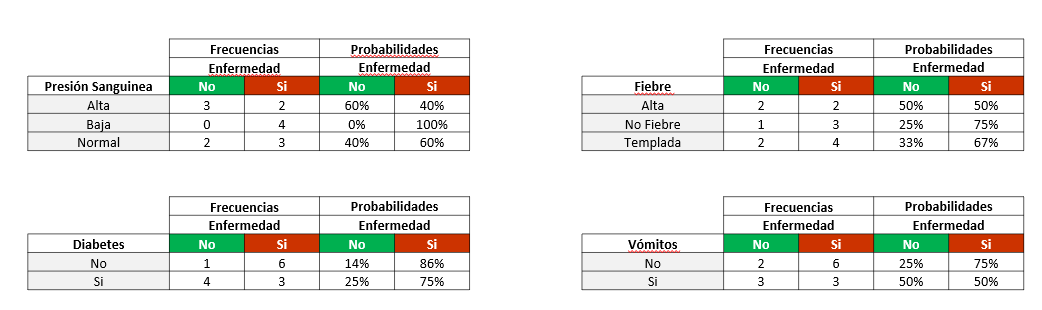

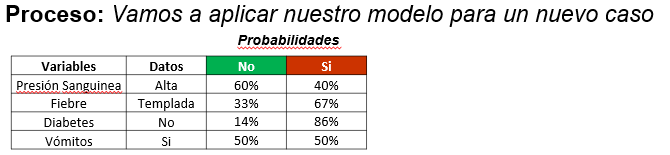

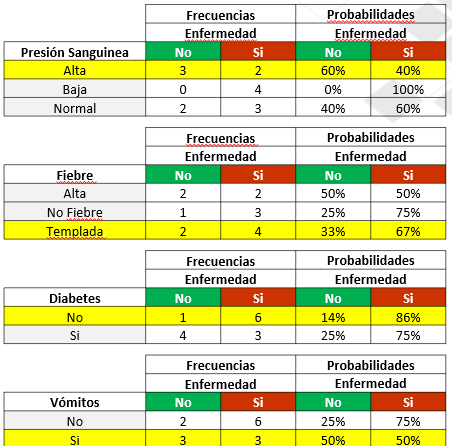

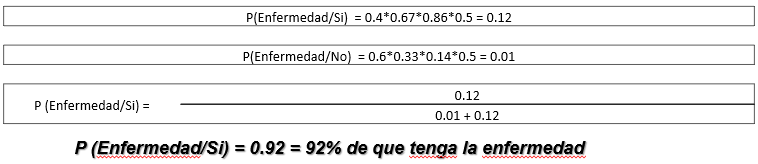

In [1]:
from IPython.display import Image

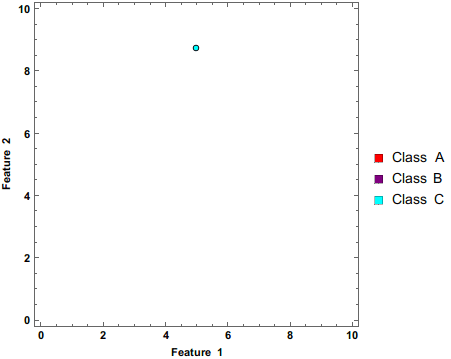

In [2]:
Image(filename=r"C:\Users\gilbe\OneDrive\Desktop\Gilberto\0. TEP\000. Analitica Avanzada de Datos ML\0. Grupo 6\Imagenes\Naive_Bayes_Classifier.gif")

# Naive Bayes

En esta sección, para practicar el uso del algoritmo de Naive Bayes, estaremos analizando un set de datos con el fin de tomar una importante decisión que se debe tomar en algún momento de la vida para la mayoría de personas, ¿me conviene comprar casa ó alquilar?

Para esto cargaremos el dataset comprar_alquilar.csv que tiene la información correspondiente.

Veamos si la Ciencia de Datos nos puede ayudar a resolver el misterio… ¿Si alquilo estoy tirando el dinero a la basura? ó ¿Es realmente conveniente pagar una hipoteca durante el resto de mi vida?

# Descripción del dataset

Las columnas que tenemos son:

- **ingresos**: los ingresos de la familia mensual
- **gastos comunes**: pagos de luz, agua, gas, etc mensual
- **pago coche**: si se est￡ pagando cuota por uno o m￡s coches, y los gastos en combustible, etc al mes.
- **gastos_otros**: compra en supermercado y lo necesario para vivir al mes
- **ahorros**: suma de ahorros dispuestos a usar para la compra de la casa.
- **vivienda**: precio de la vivienda que quiere comprar esa familia
- **estado civil**:
    - 0-soltero
    - 1-casados
    - 2-divorciados
- **hijos**: cantidad de hijos menores y que no trabajan.
- **trabajo**:
    - 0: sin empleo 
    - 1: aut￳nomo (freelance)
    - 2: empleado
    - 3: empresario
    - 4: pareja: aut￳nomos
    - 5: pareja: empleados
    - 6: pareja: aut￳nomo y asalariado
    - 7: pareja:empresario y aut￳nomo
    - 8: pareja: empresarios los dos o empresario y empleado
- **comprar (variable objetivo)**: 
    - 0: No comprar 
    - 1: Comprar
    
*La moneda es Euros*

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.float_format = '{:.2f}'.format

## Obtener los datos

In [3]:
df = pd.read_csv('comprar_alquilar.csv')

In [4]:
df.head()

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1

# Ingeniería de Variables

Todas las variables del dataset están convertidas a numericas, pero como ya sabemos el significado de cada numero para las variables que realmente son categoricas como estado civil, trabajo y comprar, vamos a darle el significado correspondiente a cada numero para fines de visualización.

In [5]:
df['estado_civil_leyenda'] = df['estado_civil'].map({0:'soltero',
                                                     1:'casados',
                                                     2:'divorciados'})

df['trabajo_leyenda'] = df['trabajo'].map({0: 'sin empleo', 
                                           1: 'aut￳nomo (freelance)',
                                           2: 'empleado',
                                           3: 'empresario',
                                           4: 'pareja: aut￳nomos',
                                           5: 'pareja: empleados',
                                           6: 'pareja: aut￳nomo y asalariado',
                                           7: 'pareja:empresario y aut￳nomo',
                                           8: 'pareja: empresarios los dos o empresario y empleado'})

df['comprar_leyenda'] = df['comprar'].map({0: 'alquila', 
                                           1: 'compra'})

# Análisis exploratorio de datos

¡Comencemos un análisis de datos exploratorio!

In [6]:
df = df.drop(['estado_civil','trabajo'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ingresos              202 non-null    int64 
 1   gastos_comunes        202 non-null    int64 
 2   pago_coche            202 non-null    int64 
 3   gastos_otros          202 non-null    int64 
 4   ahorros               202 non-null    int64 
 5   vivienda              202 non-null    int64 
 6   hijos                 202 non-null    int64 
 7   comprar               202 non-null    int64 
 8   estado_civil_leyenda  202 non-null    object
 9   trabajo_leyenda       202 non-null    object
 10  comprar_leyenda       202 non-null    object
dtypes: int64(8), object(3)
memory usage: 17.5+ KB


In [8]:
df.describe().transpose()

count      mean       std       min       25%       50%  \
ingresos       202.00   4959.00   1682.86   2008.00   3513.75   4947.50   
gastos_comunes 202.00    971.58    272.11    384.00    766.75    968.00   
pago_coche     202.00    211.74    124.94      0.00     99.00    208.50   
gastos_otros   202.00    515.43    168.10    201.00    383.25    522.50   
ahorros        202.00  38749.67  17365.23  10319.00  24964.25  38523.00   
vivienda       202.00 373349.64 136371.53 176553.00 274810.00 340783.50   
hijos          202.00      1.23      1.37      0.00      0.00      1.00   
comprar        202.00      0.33      0.47      0.00      0.00      0.00   

                     75%       max  
ingresos         6374.50   7984.00  
gastos_comunes   1165.25   1585.00  
pago_coche        318.75    448.00  
gastos_otros      656.75    828.00  
ahorros         52150.75  69934.00  
vivienda       444482.00 669540.00  
hijos               2.00      4.00  
comprar             1.00      1.00

In [9]:
df.drop('comprar', axis=1, inplace=True)

# Ingeniería de Variables

Vamos a hacer algo: procesemos algunas de estas columnas. 

Por ejemplo, podríamos agrupar los diversos gastos. También crearemos una columna llamada financiar que será la resta del precio de la vivienda con los ahorros de la familia.

In [10]:
df['gastos'] = df['gastos_comunes'] + df['gastos_otros'] + df['pago_coche']
df['financiar'] = df['vivienda']-df['ahorros']

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
df_reducida = df.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
df_reducida.describe()

ingresos   ahorros   vivienda  hijos   gastos  financiar
count    202.00    202.00     202.00 202.00   202.00     202.00
mean   4,959.00 38,749.67 373,349.64   1.23 1,698.75 334,599.97
std    1,682.86 17,365.23 136,371.53   1.37   324.84 126,607.10
min    2,008.00 10,319.00 176,553.00   0.00 1,007.00 154,716.00
25%    3,513.75 24,964.25 274,810.00   0.00 1,430.50 240,410.25
50%    4,947.50 38,523.00 340,783.50   1.00 1,669.50 301,177.00
75%    6,374.50 52,150.75 444,482.00   2.00 1,928.00 393,413.00
max    7,984.00 69,934.00 669,540.00   4.00 2,543.00 618,621.00

In [12]:
df_reducida.head()

ingresos  ahorros  vivienda  hijos estado_civil_leyenda  \
0      6000    50000    400000      2              soltero   
1      6745    43240    636897      3              casados   
2      6455    57463    321779      1          divorciados   
3      7098    54506    660933      0              soltero   
4      6167    41512    348932      0              soltero   

                                     trabajo_leyenda comprar_leyenda  gastos  \
0                                           empleado          compra    1600   
1                      pareja: aut￳nomo y asalariado         alquila    1496   
2  pareja: empresarios los dos o empresario y emp...          compra    1926   
3                                         empresario         alquila    1547   
4                                         empresario          compra    1606   

   financiar  
0     350000  
1     593657  
2     264316  
3     606427  
4     307420

# Definición de variables objetivos y predictoras

In [13]:
X = df_reducida.drop(['comprar_leyenda'],axis=1)
y = df_reducida['comprar_leyenda']

# División de set de datos de entrenamiento y prueba

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Preprocesamiento de datos

In [16]:
import os

In [17]:
os.chdir('..')

In [18]:
os.getcwd()

'C:\\Users\\gilbe\\0. Curso de Analítica Avanzada de Datos y Machine Learning v4\\06. Aprendizaje Supervisado'

In [19]:
from src.preprocessing import preprocessing

In [20]:
X_train_df, X_test_df = preprocessing(X_train,X_test, scale_nums = True)

In [21]:
X_train_df.head()

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
33       0.34     0.06      0.95  -0.94   -0.50       1.01   
45       0.37     0.74     -0.59  -0.94   -0.93      -0.73   
90      -1.23    -0.05      0.20  -0.94   -0.00       0.22   
185     -0.52     0.06     -1.04   1.91    0.58      -1.12   
200     -0.93    -1.06      0.07   0.49    0.56       0.22   

     estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
33                           0.00                              0.00   
45                           1.00                              0.00   
90                           0.00                              0.00   
185                          1.00                              0.00   
200                          1.00                              0.00   

     estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  \
33                           1.00                                 0.00   
45                           0.00                                 0.00   
90                           1.00                                 0.00   
185                          0.00                                 0.00   
200                          0.00                                 0.00   

     trabajo_leyenda_empleado  trabajo_leyenda_empresario  \
33                       0.00                        0.00   
45                       0.00                        0.00   
90                       0.00                        0.00   
185                      0.00                        0.00   
200                      0.00                        0.00   

     trabajo_leyenda_pareja: aut￳nomo y asalariado  \
33                                            0.00   
45                                            0.00   
90                                            0.00   
185                                           0.00   
200                                           0.00   

     trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
33                                0.00                               0.00   
45                                1.00                               0.00   
90                                0.00                               0.00   
185                               0.00                               1.00   
200                               0.00                               1.00   

     trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
33                                                0.00                     
45                                                0.00                     
90                                                0.00                     
185                                               0.00                     
200                                               0.00                     

     trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  
33                                           0.00                        1.00  
45                                           0.00                        0.00  
90                                           0.00                        1.00  
185                                          0.00                        0.00  
200                                          0.00                        0.00

In [22]:
X_test_df

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
178     -0.23    -0.09     -1.14   1.20   -0.13      -1.21   
142      1.72     0.34     -0.47  -0.94    0.50      -0.55   
129      0.39     1.44      0.60   0.49    0.10       0.46   
55      -0.90    -0.79     -1.02   1.91   -1.65      -0.99   
50       0.03    -0.49     -0.78   0.49    1.53      -0.77   
..        ...      ...       ...    ...     ...        ...   
192     -0.14    -1.24      0.19  -0.94    1.43       0.37   
9        1.25     0.17     -0.32  -0.23    0.16      -0.36   
179     -1.71    -0.03     -0.61  -0.94   -1.59      -0.65   
36       1.42     1.39      0.56  -0.94    1.28       0.41   
74      -0.69    -1.32     -0.01  -0.94   -0.55       0.16   

     estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
178                          0.00                              1.00   
142                          1.00                              0.00   
129                          1.00                              0.00   
55                           1.00                              0.00   
50                           1.00                              0.00   
..                            ...                               ...   
192                          0.00                              0.00   
9                            0.00                              1.00   
179                          0.00                              1.00   
36                           0.00                              0.00   
74                           0.00                              0.00   

     estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  \
178                          0.00                                 0.00   
142                          0.00                                 0.00   
129                          0.00                                 0.00   
55                           0.00                                 0.00   
50                           0.00                                 0.00   
..                            ...                                  ...   
192                          1.00                                 0.00   
9                            0.00                                 0.00   
179                          0.00                                 0.00   
36                           1.00                                 0.00   
74                           1.00                                 1.00   

     trabajo_leyenda_empleado  trabajo_leyenda_empresario  \
178                      0.00                        0.00   
142                      0.00                        0.00   
129                      0.00                        0.00   
55                       0.00                        0.00   
50                       0.00                        0.00   
..                        ...                         ...   
192                      0.00                        1.00   
9                        0.00                        0.00   
179                      0.00                        1.00   
36                       0.00                        0.00   
74                       0.00                        0.00   

     trabajo_leyenda_pareja: aut￳nomo y asalariado  \
178                                           1.00   
142                                           0.00   
129                                           0.00   
55                                            0.00   
50                                            0.00   
..                                             ...   
192                                           0.00   
9                                             0.00   
179                                           0.00   
36                                            0.00   
74                                            0.00   

     trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
178                               0.00                     

# Modelamiento

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_df,y_train)

GaussianNB()

In [24]:
predicciones = nb.predict(X_test_df)

# Evaluación del Modelo

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [26]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

     alquila       0.95      0.49      0.64        39
      compra       0.51      0.95      0.67        22

    accuracy                           0.66        61
   macro avg       0.73      0.72      0.66        61
weighted avg       0.79      0.66      0.65        61



C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


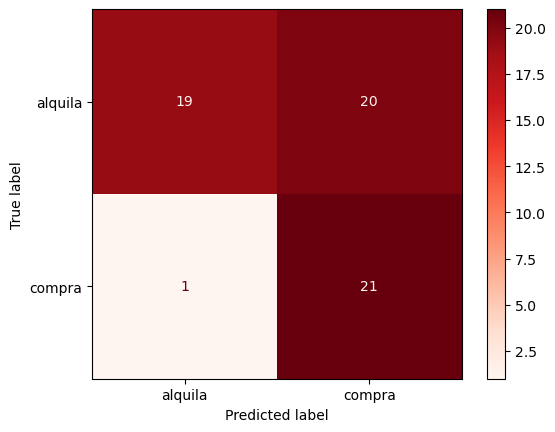

In [27]:
plot_confusion_matrix(nb, X_test_df, y_test, cmap='Reds')  
plt.show()

# Validación Cruzada

La validación cruzada es una técnica común en el aprendizaje automático y la estadística que se utiliza para evaluar el rendimiento de un modelo de manera más precisa y reducir el riesgo de sobreajuste. Su objetivo principal es estimar cómo se comportará un modelo en un conjunto de datos independiente (es decir, en datos que no se utilizaron para entrenar el modelo). La validación cruzada se realiza dividiendo el conjunto de datos en múltiples subconjuntos y evaluando el modelo en cada uno de ellos. Aquí tienes una explicación más detallada:

1. **División de los Datos:** En primer lugar, el conjunto de datos se divide en dos partes: el conjunto de entrenamiento y el conjunto de prueba. El conjunto de entrenamiento se utiliza para ajustar el modelo, mientras que el conjunto de prueba se reserva para evaluar su rendimiento.

2. **K-Fold Cross-Validation:** Una de las técnicas más comunes de validación cruzada es la validación cruzada en k-fold. En esta técnica, el conjunto de entrenamiento se divide en k subconjuntos aproximadamente iguales, llamados "folds". Por ejemplo, si eliges k = 5, tendrás 5 folds.

3. **Proceso de Evaluación:** Luego, el modelo se entrena k veces, cada vez utilizando k-1 de los folds como datos de entrenamiento y el fold restante como conjunto de prueba. En otras palabras, en cada iteración, un fold se reserva como conjunto de prueba y los otros k-1 se utilizan para entrenar el modelo.

4. **Cálculo de Métricas:** En cada iteración, el modelo se evalúa en el conjunto de prueba y se calculan métricas de rendimiento, como la precisión, el error cuadrático medio, el recall, la puntuación F1, entre otras, dependiendo del tipo de problema.

5. **Promedio de Métricas:** Una vez completadas las k iteraciones, se calcula el promedio de las métricas de rendimiento para obtener una evaluación general del modelo.

Beneficios de la Validación Cruzada:

- Permite una estimación más precisa del rendimiento del modelo al evaluarlo en múltiples subconjuntos de datos.
- Ayuda a detectar y evitar el sobreajuste, ya que el modelo se entrena y se evalúa en diferentes conjuntos de datos.
- Utiliza eficazmente todos los datos disponibles para el entrenamiento y la evaluación, lo que es especialmente útil en conjuntos de datos pequeños.

La validación cruzada es una práctica fundamental en la evaluación de modelos de aprendizaje automático y es esencial para tomar decisiones informadas sobre la selección de hiperparámetros, la elección de modelos y la estimación del rendimiento en datos no vistos. La validación cruzada en k-fold es una de las técnicas más utilizadas, pero existen variantes, como la validación cruzada leave-one-out (LOO) y la validación cruzada estratificada, que se adaptan a diferentes situaciones.

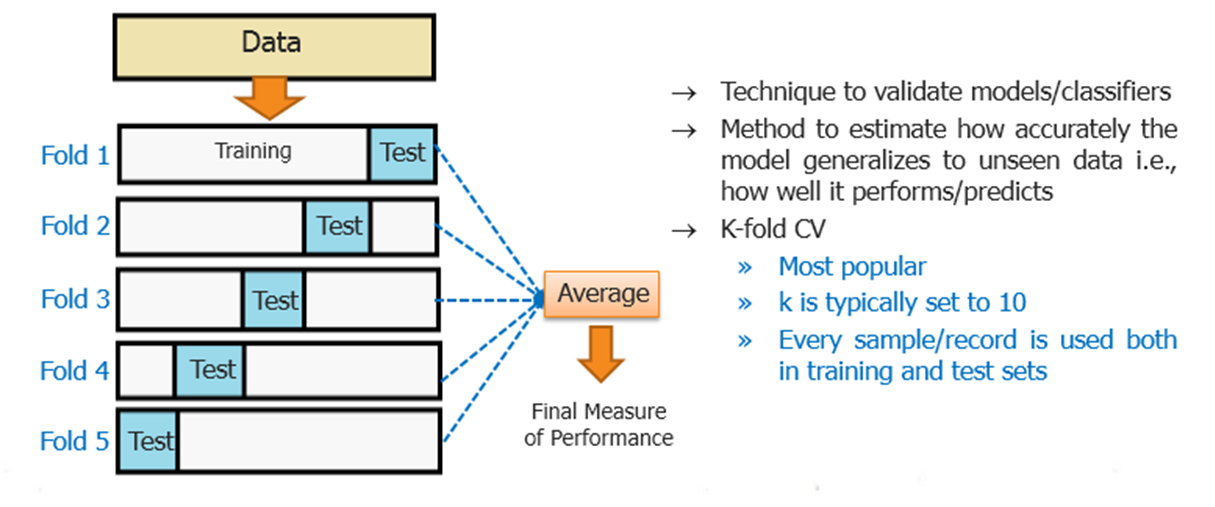

In [28]:
from sklearn.model_selection import cross_val_score

cv_score = pd.DataFrame(cross_val_score(nb,X_train_df,y_train,cv=5),columns=['exactitud'])
cv_score.sort_values(by='exactitud', ascending=False)

exactitud
2       0.64
4       0.57
1       0.54
0       0.41
3       0.39

In [29]:
cv_score.describe()

exactitud
count       5.00
mean        0.51
std         0.11
min         0.39
25%         0.41
50%         0.54
75%         0.57
max         0.64

In [30]:
cv_score_test = pd.DataFrame(cross_val_score(nb,X_test_df,y_test,cv=5),columns=['exactitud'])
cv_score_test.sort_values(by='exactitud', ascending=False)

exactitud
2       0.58
4       0.58
1       0.50
3       0.50
0       0.46

In [31]:
cv_score_test.describe()

exactitud
count       5.00
mean        0.53
std         0.05
min         0.46
25%         0.50
50%         0.50
75%         0.58
max         0.58

(0.0, 1.2)

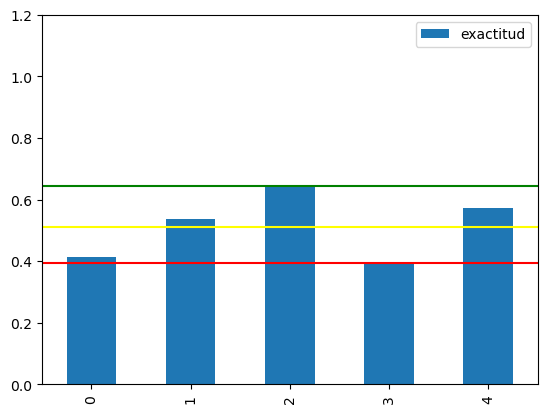

In [32]:
cv_score.plot(kind='bar')
plt.axhline(cv_score['exactitud'].mean(),color='yellow')
plt.axhline(cv_score['exactitud'].min(),color='red')
plt.axhline(cv_score['exactitud'].max(),color='green')
plt.ylim(0,1.2)

# LIME (Local interpretable model-agnostic explanations)

Traducción: Explicación Local Interpretable Agnostica de Modelos

LIME es una metodología agnostica para cualquier modelo de machine learning, lo que significa que se puede aplicar a cualquier modelo de aprendizaje automático. La técnica intenta comprender el modelo perturbando la entrada de muestras de datos y comprendiendo cómo cambian las predicciones.

In [33]:
#pip install lime

In [34]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(np.array(X_train_df), 
                                              mode="classification",
                                              class_names=nb.classes_,
                                              feature_names=X_train_df.columns,
                                             )

explainer

In [35]:
X_train_df.columns

Index(['ingresos', 'ahorros', 'vivienda', 'hijos', 'gastos', 'financiar',
       'estado_civil_leyenda_casados', 'estado_civil_leyenda_divorciados',
       'estado_civil_leyenda_soltero', 'trabajo_leyenda_aut￳nomo freelance)',
       'trabajo_leyenda_empleado', 'trabajo_leyenda_empresario',
       'trabajo_leyenda_pareja: aut￳nomo y asalariado',
       'trabajo_leyenda_pareja: aut￳nomos',
       'trabajo_leyenda_pareja: empleados',
       'trabajo_leyenda_pareja: empresarios los dos o empresario y empleado',
       'trabajo_leyenda_pareja:empresario y aut￳nomo',
       'trabajo_leyenda_sin empleo'],
      dtype='object')

In [36]:
X_train_df.head()

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
33       0.34     0.06      0.95  -0.94   -0.50       1.01   
45       0.37     0.74     -0.59  -0.94   -0.93      -0.73   
90      -1.23    -0.05      0.20  -0.94   -0.00       0.22   
185     -0.52     0.06     -1.04   1.91    0.58      -1.12   
200     -0.93    -1.06      0.07   0.49    0.56       0.22   

     estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
33                           0.00                              0.00   
45                           1.00                              0.00   
90                           0.00                              0.00   
185                          1.00                              0.00   
200                          1.00                              0.00   

     estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  \
33                           1.00                                 0.00   
45                           0.00                                 0.00   
90                           1.00                                 0.00   
185                          0.00                                 0.00   
200                          0.00                                 0.00   

     trabajo_leyenda_empleado  trabajo_leyenda_empresario  \
33                       0.00                        0.00   
45                       0.00                        0.00   
90                       0.00                        0.00   
185                      0.00                        0.00   
200                      0.00                        0.00   

     trabajo_leyenda_pareja: aut￳nomo y asalariado  \
33                                            0.00   
45                                            0.00   
90                                            0.00   
185                                           0.00   
200                                           0.00   

     trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
33                                0.00                               0.00   
45                                1.00                               0.00   
90                                0.00                               0.00   
185                               0.00                               1.00   
200                               0.00                               1.00   

     trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
33                                                0.00                     
45                                                0.00                     
90                                                0.00                     
185                                               0.00                     
200                                               0.00                     

     trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  
33                                           0.00                        1.00  
45                                           0.00                        0.00  
90                                           0.00                        1.00  
185                                          0.00                        0.00  
200                                          0.00                        0.00

In [37]:
np.random.randint(low = 0, high = len(X_train_df))

87

In [38]:
X[X.index == np.random.randint(low = 0, high = len(X))]

ingresos  ahorros  vivienda  hijos estado_civil_leyenda  \
59      3731    39448    349870      0              soltero   

         trabajo_leyenda  gastos  financiar  
59  aut￳nomo (freelance)    1669     310422

In [39]:
import pickle

In [40]:
os.getcwd()

'C:\\Users\\gilbe\\0. Curso de Analítica Avanzada de Datos y Machine Learning v4\\06. Aprendizaje Supervisado'

In [41]:
col_transformer = pickle.load(open('col_transformer', 'rb'))

In [42]:
data_nueva= X[X.index == np.random.randint(low = 0, high = len(X))]

data_nueva_df = pd.DataFrame(col_transformer.transform(data_nueva), columns = X_train_df.columns)

data_nueva_df

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
0     -1.37    -1.25     -0.68   0.49   -0.46      -0.56   

   estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
0                          0.00                              1.00   

   estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  \
0                          0.00                                 0.00   

   trabajo_leyenda_empleado  trabajo_leyenda_empresario  \
0                      0.00                        0.00   

   trabajo_leyenda_pareja: aut￳nomo y asalariado  \
0                                           0.00   

   trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
0                               0.00                               0.00   

   trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
0                                               1.00                     

   trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  
0                                          0.00                        0.00

In [43]:
explanation = explainer.explain_instance(np.array(data_nueva_df)[0], nb.predict_proba,num_features=len(X_train_df.columns))

explanation.show_in_notebook()

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [44]:
data_nueva= X[X.index == np.random.randint(low = 0, high = len(X))]

data_nueva_df_2 = pd.DataFrame(pd.DataFrame(col_transformer.transform(data_nueva), columns = X_train_df.columns))

data_nueva_df_2

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
0     -1.15    -0.48     -0.58   0.49   -1.18      -0.55   

   estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
0                          0.00                              1.00   

   estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  \
0                          0.00                                 0.00   

   trabajo_leyenda_empleado  trabajo_leyenda_empresario  \
0                      0.00                        0.00   

   trabajo_leyenda_pareja: aut￳nomo y asalariado  \
0                                           1.00   

   trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
0                               0.00                               0.00   

   trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
0                                               0.00                     

   trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  
0                                          0.00                        0.00

In [45]:
explanation = explainer.explain_instance(np.array(data_nueva_df_2)[0], nb.predict_proba,num_features=len(X_train_df.columns))

explanation.show_in_notebook()

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [46]:
#agregando predicción al df
data_nueva_df['prediccion'] = nb.predict(data_nueva_df)
data_nueva_df['proba_alquila'] = nb.predict_proba(data_nueva_df.loc[:, 
                                                                    data_nueva_df.columns != 'prediccion'])[:,0]
data_nueva_df['proba_compra'] = nb.predict_proba(data_nueva_df.loc[:, 
                                                                   ~data_nueva_df.columns.isin(['prediccion',
                                                                                                'proba_alquila'])])[:,1]
data_nueva_df

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
0     -1.37    -1.25     -0.68   0.49   -0.46      -0.56   

   estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
0                          0.00                              1.00   

   estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  ...  \
0                          0.00                                 0.00  ...   

   trabajo_leyenda_empresario  trabajo_leyenda_pareja: aut￳nomo y asalariado  \
0                        0.00                                           0.00   

   trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
0                               0.00                               0.00   

   trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
0                                               1.00                     

   trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  \
0                                          0.00                        0.00   

   prediccion proba_alquila  proba_compra  
0      compra          0.01          0.99  

[1 rows x 21 columns]

In [47]:
#agregando predicción al df
data_nueva_df_2['prediccion'] = nb.predict(data_nueva_df_2)
data_nueva_df_2['proba_alquila'] = nb.predict_proba(data_nueva_df_2.loc[:, 
                                                                    data_nueva_df_2.columns != 'prediccion'])[:,0]
data_nueva_df_2['proba_compra'] = nb.predict_proba(data_nueva_df_2.loc[:, 
                                                                   ~data_nueva_df_2.columns.isin(['prediccion',
                                                                                                'proba_alquila'])])[:,1]
data_nueva_df_2

ingresos  ahorros  vivienda  hijos  gastos  financiar  \
0     -1.15    -0.48     -0.58   0.49   -1.18      -0.55   

   estado_civil_leyenda_casados  estado_civil_leyenda_divorciados  \
0                          0.00                              1.00   

   estado_civil_leyenda_soltero  trabajo_leyenda_aut￳nomo freelance)  ...  \
0                          0.00                                 0.00  ...   

   trabajo_leyenda_empresario  trabajo_leyenda_pareja: aut￳nomo y asalariado  \
0                        0.00                                           1.00   

   trabajo_leyenda_pareja: aut￳nomos  trabajo_leyenda_pareja: empleados  \
0                               0.00                               0.00   

   trabajo_leyenda_pareja: empresarios los dos o empresario y empleado  \
0                                               0.00                     

   trabajo_leyenda_pareja:empresario y aut￳nomo  trabajo_leyenda_sin empleo  \
0                                          0.00                        0.00   

   prediccion proba_alquila  proba_compra  
0      compra          0.03          0.97  

[1 rows x 21 columns]

In [48]:
#Investigar sobre SHAP global interpreter

# Fin